# Mini-hw2

In [ ]:
import numpy as np
from scipy.sparse import dia_array  
from scipy.sparse import dia_matrix
from numba import jit, njit, prange
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.linalg import solve
import numpy as np
from mylinalg import solveLowerTriangular, solveUpperTriangular, lu, lu_solve

In [ ]:
def generate_the_laplace_matrix_with_size(N):
    nsq = N * N
    A = np.zeros((nsq, nsq))

    for i in range(N):
        for j in range(N):
            index = i * N + j
            A[index, index] = 4
            if j > 0:
                A[index, index - 1] = -1
            if j < N - 1:
                A[index, index + 1] = -1
            if i > 0:
                A[index, index - N] = -1
            if i < N - 1:
                A[index, index + N] = -1

    return A

def generate_the_rhs_vector_with_size(N, top, bottom, left, right):
    b = np.zeros(N * N)

    for i in range(N):
        b[i] += left
        b[N*i] += bottom

    for j in range(N):
        b[-N+j] += right
        b[j * N + (N - 1)] += top

    return b

def convert_solution(x, N):
    u = x.reshape(N, N)
    return u



# Use the linear albrgra solver we developed in class.

In [27]:
def solve_laplace(N, top, bottom, left, right):
    A = generate_the_laplace_matrix_with_size(N)
    b = generate_the_rhs_vector_with_size(N, top, bottom, left, right)
    x = lu_solve(A, b)
    u = convert_solution(x, N)
    return u

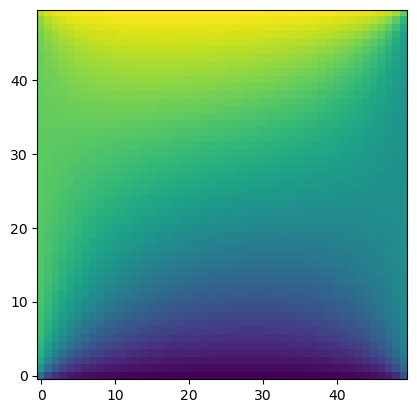

In [28]:
N = 50  # Grid size
top, bottom, left, right = 100, 0, 75, 50

# Solve and visualize
u = solve_laplace(N, top, bottom, left, right)
plt.imshow(u.T,origin="lower")

# Use scipy.linalg

In [29]:
def solve_laplace(N, top, bottom, left, right):
    A = generate_the_laplace_matrix_with_size(N)
    b = generate_the_rhs_vector_with_size(N, top, bottom, left, right)
    x = solve(A, b)
    u = convert_solution(x, N)
    return u

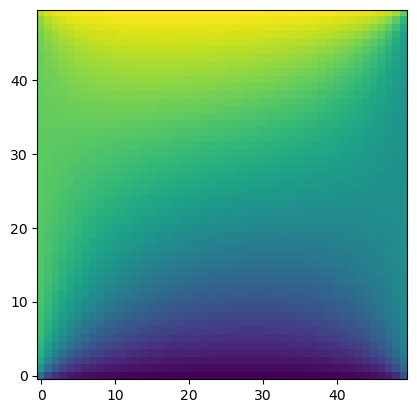

In [30]:
N = 50  # Grid size
top, bottom, left, right = 100, 0, 75, 50

# Solve and visualize
u = solve_laplace(N, top, bottom, left, right)
plt.imshow(u.T,origin="lower")